In [ ]:
#Imports:
import torch
from diffusers import StableDiffusionPipeline
from transformers import BlipProcessor, BlipForConditionalGeneration
import matplotlib.pyplot as plt

Initialize models

In [ ]:
imgModel = "runwayml/stable-diffusion-v1-5"
imgPipe = StableDiffusionPipeline.from_pretrained(imgModel, variant="fp16", torch_dtype=torch.float16).to("cuda")
blip_model_id = "Salesforce/blip-image-captioning-base"
blip_processor = BlipProcessor.from_pretrained(blip_model_id)
blip_model = BlipForConditionalGeneration.from_pretrained(blip_model_id).to("cuda")

Functions to generate image and caption image

In [3]:
def generate_image(prompt="",inference_steps=25):
    imageOut = imgPipe(prompt, num_inference_steps=inference_steps).images[0]
    return imageOut

def describe_image(image):
    inputs = blip_processor(images=image, return_tensors="pt").to("cuda")
    out = blip_model.generate(**inputs, do_sample = True, temperature=1.9, max_length=600)
    description = blip_processor.decode(out[0], skip_special_tokens=True)
    return description

Function to iteratively generate an image, caption it, append the image and caption to an array for future viewing, and set the prompt for next iteration's image generation

In [4]:
def iterative_generate(num_iterations, inference_steps, self_referential):
    images_and_captions = []

    prompt = ""
    for i in range(num_iterations):
        # Generate an initial random image
        image = generate_image(prompt,inference_steps)
        
        # Generate a caption for the image
        description = describe_image(image)
        
        # Print iteration number
        print(f"Iteration {i+1}: {description}")

        # Store the image and description
        images_and_captions.append((image, description))

        if self_referential:
            prompt = description
        else:
            prompt = ""

    return images_and_captions

Function to display the generated images and their captions

In [5]:
def display_images_and_captions(images_and_captions):
    num_images = len(images_and_captions)
    plt.figure(figsize=(15, 5 * num_images))

    for i, (image, caption) in enumerate(images_and_captions):
        plt.subplot(num_images, 1, i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Iteration {i+1}: {caption}")

    plt.tight_layout()
    plt.show()

Run this cell to generate the output:

100%|██████████| 25/25 [00:03<00:00,  7.07it/s]


Iteration 1: large container laying up


100%|██████████| 25/25 [00:03<00:00,  7.43it/s]


Iteration 2: a rusty white fire hydra near cargo containers as another looks around to the left for the right of frame


100%|██████████| 25/25 [00:03<00:00,  7.33it/s]


Iteration 3: fire breathing outside


100%|██████████| 25/25 [00:03<00:00,  7.18it/s]


Iteration 4: a man holds an olympic national fire during olympics


100%|██████████| 25/25 [00:03<00:00,  7.28it/s]


Iteration 5: us sochos win olympics golds, 2012 | wired - sports


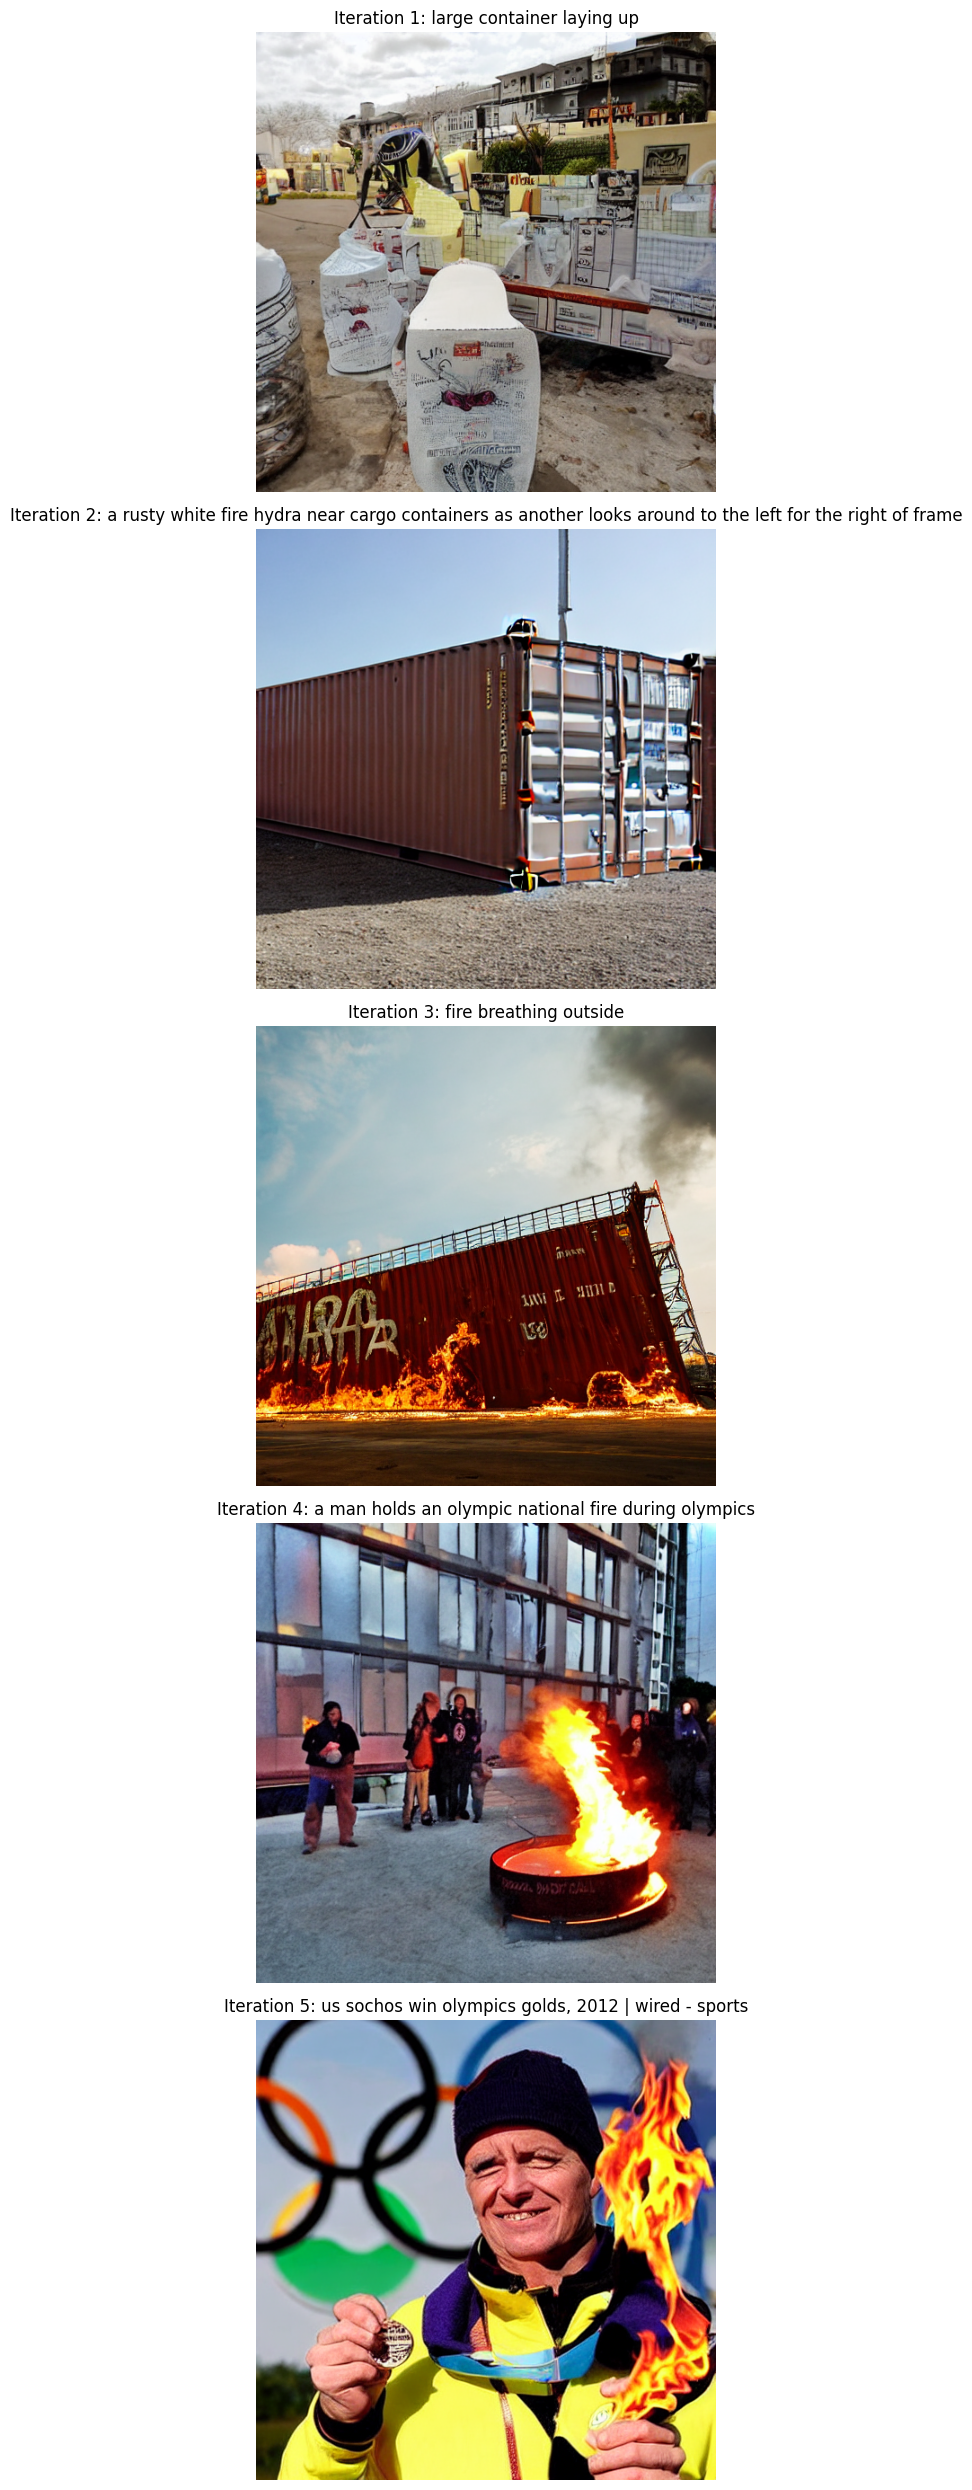

In [8]:
# Generate this many images and captions
num_iterations = 5

# Set the number of inference steps for diffusion, adjust for runtime and clarity
inference_steps = 25

# Sets whether or not model uses prior caption as next image prompt - if false, prompt is set to empty string
self_referential = True

# Perform the iterative process
images_and_captions = iterative_generate(num_iterations, inference_steps, self_referential)

# Display the images and captions
display_images_and_captions(images_and_captions)